In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 

In [2]:
model = AbstractModel()
model.i = Set()
model.housingspace     =Param(model.i)
model.damage           =Param(model.i)
model.Trainingcostred  =Param(model.i)
model.TrainingcostDark =Param(model.i)
model.Hitpoint         =Param(model.i)
model.Trainingtime     =Param(model.i)
model.camp             =Param()
model.RedElexir        =Param()
model.DarkElexir       =Param()

model.x = Var(model.i , bounds=(0,300), within=NonNegativeIntegers, initialize=0)
model.Tattack = Var(within=Reals)
model.Thitpoint = Var(within=Reals)
model.time= Var(within=Reals)


def rule_C1(model):
    return model.Tattack==sum(model.damage[i]*model.x[i] for i in model.i)
model.C1   = Constraint(rule=rule_C1)

def rule_C2(model):
    return sum(model.housingspace[i]*model.x[i] for i in model.i)<=model.camp
model.C2   = Constraint(rule=rule_C2)

def rule_C3(model):
    return sum(model.Trainingcostred[i]*model.x[i] for i in model.i)<=model.RedElexir
model.C3   = Constraint(rule=rule_C3)

def rule_C4(model):
    return sum(model.TrainingcostDark[i]*model.x[i] for i in model.i)<=model.DarkElexir
model.C4   = Constraint(rule=rule_C4)

def rule_C5(model):
    return model.Thitpoint ==sum(model.Hitpoint[i]*model.x[i] for i in model.i)
model.C5   = Constraint(rule=rule_C5)

def rule_C6(model):
    return model.time ==sum(model.Trainingtime[i]*model.x[i] for i in model.i)
model.C6   = Constraint(rule=rule_C6)

model.obj1 = Objective(expr=model.Tattack   , sense=maximize)
model.obj2 = Objective(expr=model.Thitpoint, sense=maximize)
model.obj3 = Objective(expr=model.time, sense=maximize)

In [3]:
opt = SolverFactory('glpk')

Text(0.5, 1.0, 'Maximize Damage =16434.0,  traintime= 2144.0')

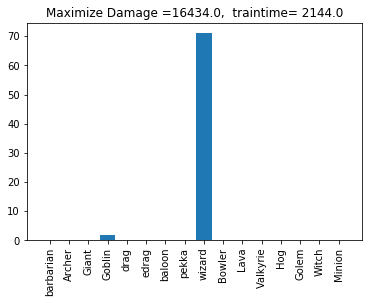

In [4]:
model.obj2.deactivate()
model.obj3.deactivate()
model.obj1.activate()
instance = model.create_instance("EX15.dat")
results = opt.solve(instance) # solves and updates instance
X=[i for i in instance.i]
Y=[value(instance.x[i]) for i in instance.i]
plt.bar(X,Y)
plt.xticks(rotation=90)
plt.title('Maximize Damage ='+str(value(instance.Tattack)) + ',  traintime= '+ str(value(instance.time)))

Text(0.5, 1.0, 'Maximize Hitpoints =105655.0,  traintime= 3425.0')

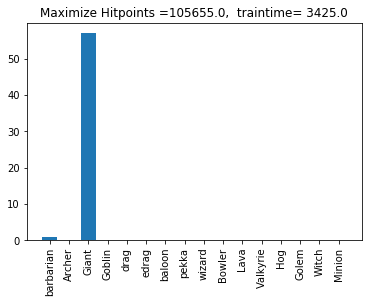

In [5]:
model.obj2.activate()
model.obj1.deactivate()
model.obj3.deactivate()
instance = model.create_instance("EX15.dat")
results = opt.solve(instance) # solves and updates instance
X=[i for i in instance.i]
Y=[value(instance.x[i]) for i in instance.i]
plt.bar(X,Y)
plt.xticks(rotation=90)
plt.title('Maximize Hitpoints ='+str(value(instance.Thitpoint)) + ',  traintime= '+ str(value(instance.time)))